# Instrucciones
### Nombre: Mariana Ávalos Arce
Resuelve los ejercicios que viene a continuación utilizando los datos descritos en:
[https://corgis-edu.github.io/corgis/csv/broadway/](https://corgis-edu.github.io/corgis/csv/broadway/)

In [ ]:
!wget https://raw.githubusercontent.com/DRMiguelAR/Herramientas_Analisis/master/broadway.csv

In [1]:
import csv
f=open("broadway.csv")
data=list(csv.reader(f))
headers = data[0]
print(headers)
data=data[1:]

['Date.Day', 'Date.Full', 'Date.Month', 'Date.Year', 'Show.Name', 'Show.Theatre', 'Show.Type', 'Statistics.Attendance', 'Statistics.Capacity', 'Statistics.Gross', 'Statistics.Gross Potential', 'Statistics.Performances']


1. Organiza tus datos

In [2]:
db = []
for item in data:
    d = {h:val for h, val in zip(headers, item)}
    db.append(d)
db

[{'Date.Day': '26',
  'Date.Full': '8/26/1990',
  'Date.Month': '8',
  'Date.Year': '1990',
  'Show.Name': 'Tru',
  'Show.Theatre': 'Booth',
  'Show.Type': 'Play',
  'Statistics.Attendance': '5500',
  'Statistics.Capacity': '88',
  'Statistics.Gross': '134456',
  'Statistics.Gross Potential': '0',
  'Statistics.Performances': '8'},
 {'Date.Day': '24',
  'Date.Full': '3/24/1991',
  'Date.Month': '3',
  'Date.Year': '1991',
  'Show.Name': 'Miss Saigon',
  'Show.Theatre': 'Broadway',
  'Show.Type': 'Musical',
  'Statistics.Attendance': '1737',
  'Statistics.Capacity': '100',
  'Statistics.Gross': '100647',
  'Statistics.Gross Potential': '0',
  'Statistics.Performances': '0'},
 {'Date.Day': '31',
  'Date.Full': '3/31/1991',
  'Date.Month': '3',
  'Date.Year': '1991',
  'Show.Name': 'Miss Saigon',
  'Show.Theatre': 'Broadway',
  'Show.Type': 'Musical',
  'Statistics.Attendance': '12160',
  'Statistics.Capacity': '100',
  'Statistics.Gross': '634424',
  'Statistics.Gross Potential': '0',
  

1. Crea una lista de todas las obras que aparecen y cuéntalas.

In [3]:
from collections import Counter
shows = [str(d.get('Show.Name')) for d in db]
shows = set(shows)
len(shows)

820

1. Cuenta el número de personas que atendieron cada obra a través de todos los años con ayuda de un diccionario

In [5]:
attendees = [int(d.get('Statistics.Attendance')) for d in db]
total_attendees = sum(attendees)
total_attendees

250697328

1. Encuentra las 20 obras con más público

In [13]:
shows = list(shows)
attendees_dict = {show:0 for show in shows}
for d in db:
    attendees_dict[d.get('Show.Name')] += int(d.get('Statistics.Attendance'))
attendees_dict

attendees_tuple = [(key, attendees_dict.get(key)) for key in attendees_dict.keys()]
public_sort = sorted(attendees_tuple, key= lambda x: x[1], reverse=True)
public_sort[:20]

[('The Lion King', 13207871),
 ('The Phantom Of The Opera', 11582362),
 ('Wicked', 9524462),
 ('Chicago', 8123328),
 ('Beauty And The Beast', 7609397),
 ('Mamma Mia!', 7566124),
 ('Miss Saigon', 5843972),
 ('Jersey Boys', 4971699),
 ('Rent', 4969873),
 ('Mary Poppins', 3878444),
 ('The Producers', 3672795),
 ('Les Miserables', 3466401),
 ('Hairspray', 3418653),
 ('Aida', 2714193),
 ('The Book Of Mormon', 2497551),
 ('Cats', 2290852),
 ("42Nd Street '01", 2199186),
 ("Monty Python'S Spamalot", 2075781),
 ('Spider-Man Turn Off The Dark', 2068468),
 ('Cabaret 98', 1919198)]

Genera las siguientes gráficas:
1. Para cada una de las 20 obras más populares, genera una gráfica que represente de la mejor manera los cambios en la cantidad de público año por año.
2. Para las 5 obras más populares, genera una gráfica que compare de la mejor manera la cantidad de público total entre ellas.
3. Para la obra de Mary Poppins, genera una gráfica en la que se pueda comparar la asistencia a la obra en los diferentes meses del año.
5. Genera una gráfica a tu elección que demuestre el comportamiento de alguna otra variable de los datos (tipo de show, teatros donde se presentan, etcétera)

Extra: Para la obra de Cats, genera una gráfica en la que se aprecie de la mejor manera, una comparativa sobre la cantidad de semanas en que se lograron llenar el teatro a diferentes capacidades.

1. Para cada una de las 20 obras más populares, genera una gráfica que represente de la mejor manera los cambios en la cantidad de público año por año.

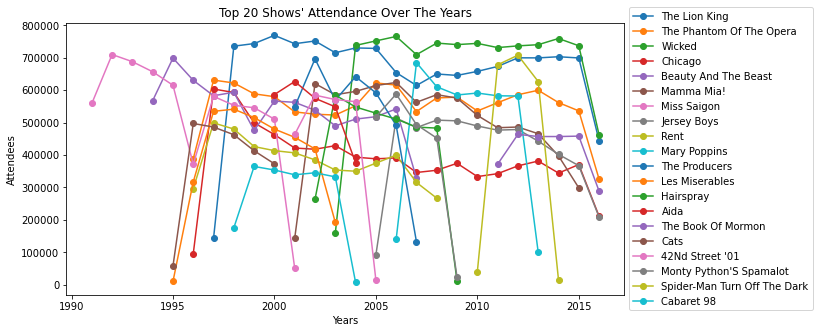

In [56]:
import matplotlib.pyplot as plt

pop_shows = public_sort[:20]
pop_titles = [ps[0] for ps in pop_shows]
info = {show:{} for show in pop_titles}
pop_db = []
for d in db:
    show = d.get('Show.Name')
    if show not in pop_titles: continue
    year = d.get('Date.Year')
    info[show][year] = 0
    pop_db.append(d)
    
for d in pop_db:
    show = d.get('Show.Name')
    year = d.get('Date.Year')
    info[show][year] += int(d.get('Statistics.Attendance'))

titles = []
year_info = []
for show in info.keys():
    titles.append(show)
    show_years = []
    for year in info[show].keys():
        show_years.append((int(year), info[show][year]))
    show_years = sorted(show_years, key= lambda x: x[0])
    year_info.append(show_years)

for i in range(len(titles)):
    xs = [t[0] for t in year_info[i]]
    ys = [t[1] for t in year_info[i]]
    plt.plot(xs, ys, label=titles[i], marker='o')
plt.rcParams["figure.figsize"] = (5,10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Years")
plt.ylabel("Attendees")
plt.title("Top 20 Shows' Attendance Over The Years")
plt.show()

2. Para las 5 obras más populares, genera una gráfica que compare de la mejor manera la cantidad de público total entre ellas.

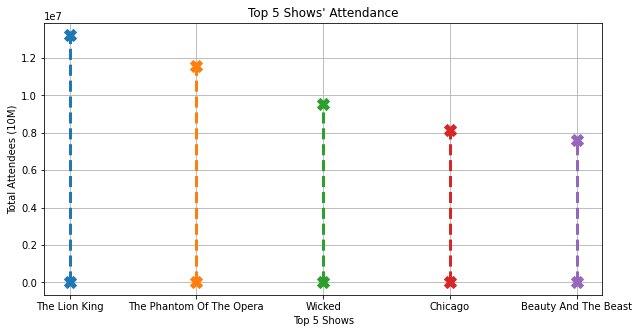

In [87]:
import numpy as np
top5 = public_sort[:5]
xs = list(np.arange(0,len(top5)))
names = [t[0] for t in top5]
ys = [t[1] for t in top5]
plt.rcParams["figure.figsize"] = (10,5)

ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels(names)

for i in range(len(top5)):
    plt.plot([xs[i], xs[i]],[0, ys[i]], marker='X', markersize=12, linestyle='--', linewidth='3')
plt.grid(True)
plt.xlabel("Top 5 Shows")
plt.ylabel("Total Attendees (10M)")
plt.title("Top 5 Shows' Attendance")
plt.show()

3. Para la obra de Mary Poppins, genera una gráfica en la que se pueda comparar la asistencia a la obra en los diferentes meses del año.

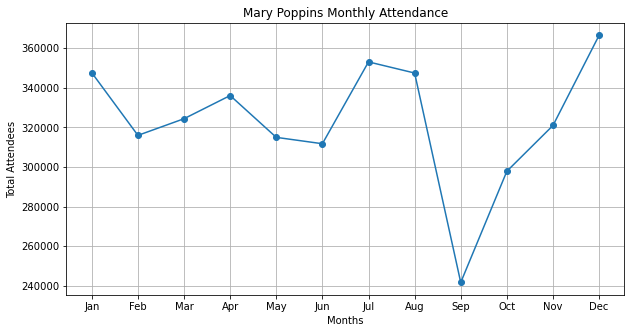

In [95]:
import calendar

months = [calendar.month_abbr[i+1] for i in range(12)]
show = 'Mary Poppins'
attendees_month = [0 for i in range(12)]

for d in db:
    title = d.get('Show.Name')
    if title == show:
        month = int(d.get('Date.Month'))
        attendees_month[month - 1] += int(d.get('Statistics.Attendance'))

xs = list(np.arange(0,len(attendees_month)))
plt.plot(xs, attendees_month, marker='o')

ax = plt.gca()
ax.set_xticks(xs)
ax.set_xticklabels(months)

plt.grid()
plt.xlabel("Months")
plt.ylabel("Total Attendees")
plt.title("Mary Poppins Monthly Attendance")
plt.show()

4. Genera una gráfica a tu elección que demuestre el comportamiento de alguna otra variable de los datos (tipo de show, teatros donde se presentan, etcétera)

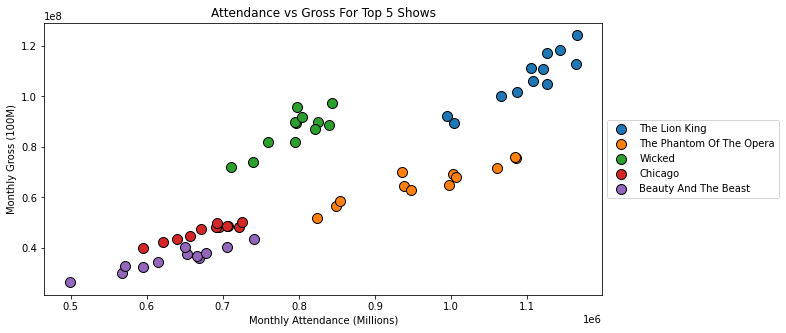

In [131]:
top5 = [t[0] for t in public_sort[:5]]
gross_month = [[0 for i in range(12)] for i in range(5)]
attendance_month = [[0 for i in range(12)] for i in range(5)]

for d in db:
    title = d.get('Show.Name')
    if title in top5:
        top = top5.index(title)
        month = int(d.get('Date.Month'))
        gross_month[top][month - 1] += int(d.get('Statistics.Gross'))
        attendance_month[top][month - 1] += int(d.get('Statistics.Attendance'))
        
for i in range(len(top5)): 
    plt.scatter(attendance_month[i], gross_month[i], marker='o', s=100, label=top5[i], edgecolor='black')
    # plt.show() here if you want to make many plots

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Monthly Attendance (Millions)")
plt.ylabel("Monthly Gross (100M)")
plt.title("Attendance vs Gross For Top 5 Shows")
plt.show()